In [1]:
#importing necessary libraries
import pandas as pd
import geopandas as gpd
import folium
from folium import Marker,GeoJson
from folium.plugins import HeatMap

In [7]:
#data containing toxic chemical release in philadelphia
chemical = gpd.read_file("/Users/sdevkota01/Downloads/Python/GEO/toxic_release_pennsylvania/toxic_release_pennsylvania/toxic_release_pennsylvania.shp")
chemical.head().append(chemical.tail()) # checking first and last rows of the geo data frame

,YEAR,CITY,COUNTY,ST,LATITUDE,LONGITUDE,CHEMICAL,UNIT_OF_ME,TOTAL_RELE,geometry
0,2016,PHILADELPHIA,PHILADELPHIA,PA,40.005901,-75.072103,FORMIC ACID,Pounds,0.160,POINT (2718560.227 256380.179)
1,2016,PHILADELPHIA,PHILADELPHIA,PA,39.920120,-75.146410,ETHYLENE GLYCOL,Pounds,13353.480,POINT (2698674.606 224522.905)
2,2016,PHILADELPHIA,PHILADELPHIA,PA,40.023880,-75.220450,CERTAIN GLYCOL ETHERS,Pounds,104.135,POINT (2676833.394 261701.856)
3,2016,PHILADELPHIA,PHILADELPHIA,PA,39.913540,-75.198890,LEAD COMPOUNDS,Pounds,1730.280,POINT (2684030.004 221697.388)
4,2016,PHILADELPHIA,PHILADELPHIA,PA,39.913540,-75.198890,BENZENE,Pounds,39863.290,POINT (2684030.004 221697.388)
4658,1987,PHILADELPHIA,PHILADELPHIA,PA,40.011090,-75.120810,NAPHTHALENE,Pounds,250.000,POINT (2704865.537 257859.679)
4659,1987,PHILADELPHIA,PHILADELPHIA,PA,40.004738,-75.113728,SODIUM HYDROXIDE (SOLUTION),Pounds,250.000,POINT (2706917.492 255605.917)
4660,1987,PHILADELPHIA,PHILADELPHIA,PA,39.901577,-75.203163,SODIUM HYDROXIDE (SOLUTION),Pounds,250.000,POINT (2682957.516 217306.705)
4661,1987,PHILADELPHIA,PHILADELPHIA,PA,39.978000,-75.119050,LEAD,Pounds,332.000,POINT (2705717.380 245825.600)
4662,1987,PHILADELPHIA,PHILADELPHIA,PA,39.962710,-75.163080,CARBON TETRACHLORIDE,Pounds,123932.000,POINT (2693546.448 239893.629)


In [19]:
# data containing air quality monitoring stations in philadelphia
air = gpd.read_file("/Users/sdevkota01/Downloads/Python/GEO/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations.shp")
air.head().append(air.tail())

,SITE_NAME,ADDRESS,BLACK_CARB,ULTRAFINE_,CO,SO2,OZONE,NO2,NOY_NO,PM10,...,PAMS_VOC,TSP_11101,TSP_METALS,TSP_LEAD,TOXICS_TO1,MET,COMMUNITY_,LATITUDE,LONGITUDE,geometry
0,LAB,1501 East Lycoming Avenue,N,N,Y,N,Y,Y,Y,N,...,Y,N,Y,N,y,N,N,40.008606,-75.097624,POINT (2711384.641 257149.310)
1,ROX,Eva and Dearnley Streets,N,N,N,N,N,N,N,N,...,N,N,Y,N,Y,N,N,40.050461,-75.236966,POINT (2671934.290 271248.900)
2,NEA,Grant Avenue and Ashton Street,N,N,N,N,Y,N,N,N,...,N,N,N,N,N,Y,N,40.072073,-75.013128,POINT (2734326.638 280980.247)
3,CHS,500 South Broad Street,N,N,N,N,N,N,N,N,...,N,N,Y,N,Y,N,N,39.944510,-75.165442,POINT (2693078.580 233247.101)
4,NEW,2861 Lewis Street,N,N,Y,Y,Y,N,Y,Y,...,N,Y,N,Y,N,Y,N,39.991688,-75.080378,POINT (2716399.773 251134.976)
7,SWA,8200 Enterprise Avenue,N,N,N,N,N,N,N,N,...,N,N,Y,N,Y,N,N,39.885014,-75.220794,POINT (2678185.661 211133.454)
8,TOR,4900 Grant Avenue,N,N,Y,N,N,Y,N,N,...,N,N,N,N,N,Y,N,40.053969,-74.983680,POINT (2742770.481 274645.396)
9,PHA,3100 Penrose Ferry Road,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,Y,39.912790,-75.185448,POINT (2687807.072 221533.464)
10,MON,I-76 and Montgomery,Y,Y,N,N,N,Y,N,N,...,N,Y,Y,N,N,Y,N,39.988969,-75.207257,POINT (2680892.753 249095.833)
11,VGR,6th and Arch,N,N,N,N,Y,N,N,N,...,N,N,N,N,N,Y,N,39.952756,-75.149908,POINT (2697343.868 236377.621)


In [9]:
#measuring distance from two different GeoDataFrame
# first make sure both uses same Coordinate reference system
print(chemical.crs)
print(air.crs)

epsg:2272
epsg:2272


In [10]:
#in this case we have same CRS 
#crs proviudes information on what unit to use here in our case our measuring unit will be foot

# selecting one particular toxic chemical release data
recent_release = chemical.iloc[360]
recent_release

YEAR                                                       2012
CITY                                               PHILADELPHIA
COUNTY                                             PHILADELPHIA
ST                                                           PA
LATITUDE                                               39.91354
LONGITUDE                                             -75.19889
CHEMICAL      SULFURIC ACID (1994 AND AFTER ACID AEROSOLS" O...
UNIT_OF_ME                                               Pounds
TOTAL_RELE                                             365600.0
geometry            POINT (2684030.004021309 221697.3882902659)
Name: 360, dtype: object

In [14]:
# to measure distance from this particular toxic release to the stations
distances = air.geometry.distance(recent_release.geometry)
distances

0     44778.509761
1     51006.456589
2     77744.509207
3     14672.170878
4     43753.554393
5      4711.658655
6     23197.430858
7     12072.823097
8     79081.825506
9      3780.623591
10    27577.474903
11    19818.381002
dtype: float64

In [21]:
# to calulate mean distance of the station 
mean = distances.mean()
mean

33516.28487007786

In [23]:
# another representation of mean
print("Mean distance to monitoring Stations: {} feet".format(distances.mean()))

Mean distance to monitoring Stations: 33516.28487007786 feet


In [27]:
# distance of the closest monitoring station
closest = distances.min()
print("the closest monitoring station is {} feet ".format(closest))

the closest monitoring station is 3780.623590556444 feet 


In [30]:
# extracting information of a closest station
close = air.iloc[distances.idxmin()][['ADDRESS','LATITUDE','LONGITUDE']]
close

ADDRESS      3100 Penrose Ferry Road
LATITUDE                    39.91279
LONGITUDE                 -75.185448
Name: 9, dtype: object

In [33]:
# to understand all points on a map that are some radius away from a point, simplest way is to create a buffer.
buffer = air.geometry.buffer(2*5280)
# here a geoseries series is created containing 12 different ploygon objects. each polygon is a buffer of 2 miles 
# or (2*5280)feet around a different air monitoring stations
buffer.head().append(buffer.tail())

0     POLYGON ((2721944.641 257149.310, 2721893.792 ...
1     POLYGON ((2682494.290 271248.900, 2682443.441 ...
2     POLYGON ((2744886.638 280980.247, 2744835.789 ...
3     POLYGON ((2703638.580 233247.101, 2703587.731 ...
4     POLYGON ((2726959.773 251134.976, 2726908.924 ...
7     POLYGON ((2688745.661 211133.454, 2688694.812 ...
8     POLYGON ((2753330.481 274645.396, 2753279.631 ...
9     POLYGON ((2698367.072 221533.464, 2698316.223 ...
10    POLYGON ((2691452.753 249095.833, 2691401.904 ...
11    POLYGON ((2707903.868 236377.621, 2707853.019 ...
dtype: geometry

In [42]:
# we use folium.GeoJson() to plot each polygon on map
# for folium we have to convert CRS to EPSG 4326 because folium requires latitude and longitude
Map = folium.Map(location = [39.9526,-75.1652],zoom_start = 11)
HeatMap(data = chemical[['LATITUDE','LONGITUDE']],radius = 15).add_to(Map)

for idx, row in air.iterrows():
    Marker([row['LATITUDE'],row['LONGITUDE']]).add_to(Map)
    
# converting crs to 4326
GeoJson(buffer.to_crs(epsg=4326)).add_to(Map)
Map

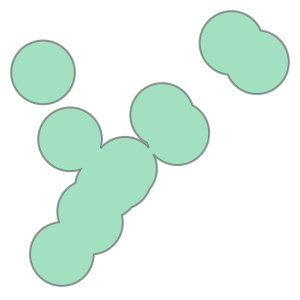

In [44]:
#turning group of polygon into single polygon 
single = buffer.geometry.unary_union
single

In [47]:
# IS CLOSEST STATION LESS THAN A MILE AWAY ?
single.contains(chemical.iloc[360].geometry)
# we use contains() to check if the multipolygon contains a point from chemical

True

In [49]:
Map_2 = folium.Map(location = [39.9526,-75.1652],zoom_start = 11)

Marking Chemical Release points
for idx, row in chemical.iterrows():
    Marker([row['LATITUDE'],row['LONGITUDE']]).add_to(Map_2)

Map_2
    